In [1]:
from google.colab import drive
drive.mount('/content/drive')

import yfinance as yf
import pandas as pd



# Clean ticker list (remove NaNs, non-strings, duplicates)

tickers=['AAPL', 'MSFT', 'NVDA', 'GOOG', 'AMZN', 'TSLA',
           'META', 'NFLX', 'JPM', 'BAC', 'XOM', 'CVX',
           'GOLD', 'SILVER', 'SPY', 'QQQ', 'BTC-USD', 'ETH-USD']

# Download data safely
data = yf.download(tickers, start="2024-01-01", end="2025-10-22", group_by='ticker', threads=True)

# Save to Google Drive
data.to_csv('/content/drive/MyDrive/CryPe/nasdaq_equities_data.csv')

print("✅ Data downloaded and saved successfully!")


Mounted at /content/drive


/tmp/ipython-input-1862833456.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2024-01-01", end="2025-10-22", group_by='ticker', threads=True)
[***********           22%                       ]  4 of 18 completedERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: GOLD"}}}
[**********************61%****                   ]  11 of 18 completedERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: SILVER"}}}
[*********************100%***********************]  18 of 18 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['GOLD', 'SILVER']: YFTzMissingError('possibly delisted; no timezone found')


✅ Data downloaded and saved successfully!


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data.shape

(660, 92)

In [4]:
data.columns.names

FrozenList(['Ticker', 'Price'])

In [5]:
flat = data.stack(level='Ticker', future_stack=True).reset_index()
print(flat.columns)

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Adj Close'],
      dtype='object', name='Price')


In [6]:
flat.shape

(11880, 8)

In [7]:
print(list(flat.columns))
print("\n🕒 Date range:", flat['Date'].min(), "→", flat['Date'].max())
print("\n🏢 Unique tickers:", flat['Ticker'].nunique())
display(flat.describe)
print(flat.isnull().sum())
dupes = flat.duplicated(subset=['Date','Ticker']).sum()
print(f"\n🔁 Duplicate Date–Ticker pairs: {dupes}")

['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

🕒 Date range: 2024-01-01 00:00:00 → 2025-10-21 00:00:00

🏢 Unique tickers: 18


<bound method NDFrame.describe of Price       Date   Ticker         Open         High          Low        Close  \
0     2024-01-01     TSLA          NaN          NaN          NaN          NaN   
1     2024-01-01     AMZN          NaN          NaN          NaN          NaN   
2     2024-01-01      QQQ          NaN          NaN          NaN          NaN   
3     2024-01-01      BAC          NaN          NaN          NaN          NaN   
4     2024-01-01  ETH-USD  2282.870361  2352.327881  2267.018066  2352.327881   
...          ...      ...          ...          ...          ...          ...   
11875 2025-10-21   SILVER          NaN          NaN          NaN          NaN   
11876 2025-10-21     MSFT   517.500000   518.690002   513.039978   517.659973   
11877 2025-10-21      XOM   112.889999   113.360001   111.989998   112.709999   
11878 2025-10-21     META   736.020020   738.500000   728.750000   733.270020   
11879 2025-10-21     NVDA   182.789993   182.789993   179.800003   181.160004   

Price        Volume  Adj Close  
0               NaN        NaN  
1               NaN        NaN  
2               NaN        NaN  
3               NaN        NaN  
4      6.906766e+09        NaN  
...             ...        ...  
11875           NaN        NaN  
11876  1.558620e+07        NaN  
11877  9.202300e+06        NaN  
11878  7.647300e+06        NaN  
11879  1.242402e+08        NaN  

[11880 rows x 8 columns]>

Price
Date             0
Ticker           0
Open          4218
High          4218
Low           4218
Close         4218
Volume        4218
Adj Close    11880
dtype: int64

🔁 Duplicate Date–Ticker pairs: 0


In [8]:
flat = flat.groupby('Ticker').apply(lambda x: x.fillna(method='ffill')).reset_index(drop=True)

/tmp/ipython-input-2390465824.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  flat = flat.groupby('Ticker').apply(lambda x: x.fillna(method='ffill')).reset_index(drop=True)
/tmp/ipython-input-2390465824.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  flat = flat.groupby('Ticker').apply(lambda x: x.fillna(method='ffill')).reset_index(drop=True)


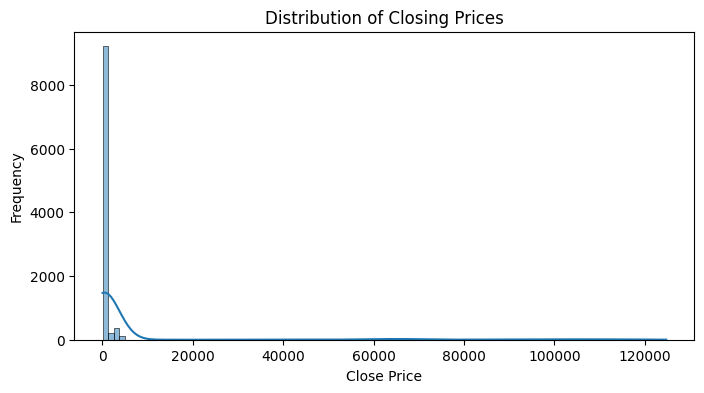

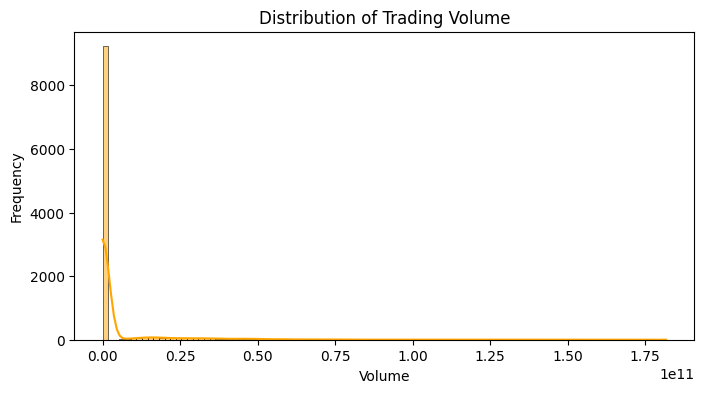

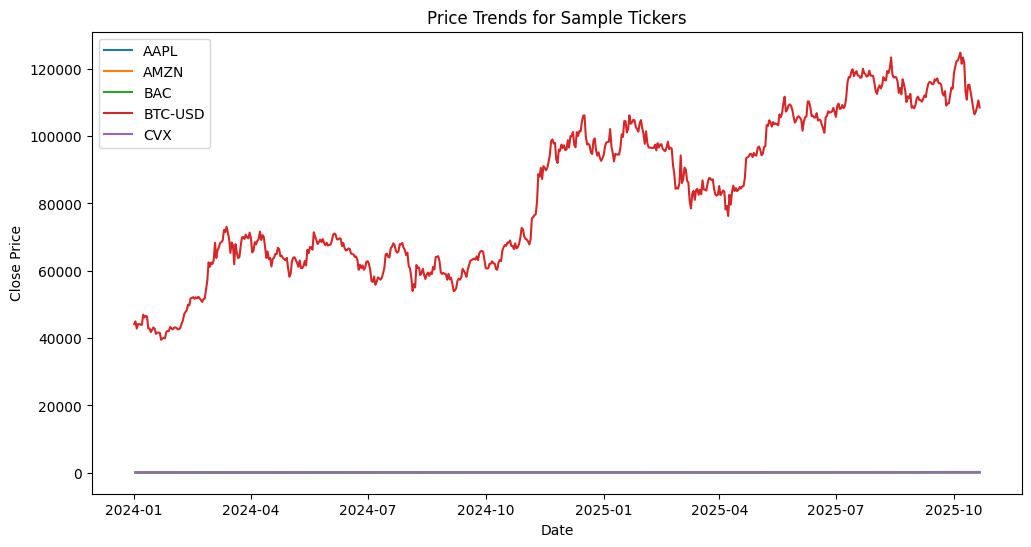

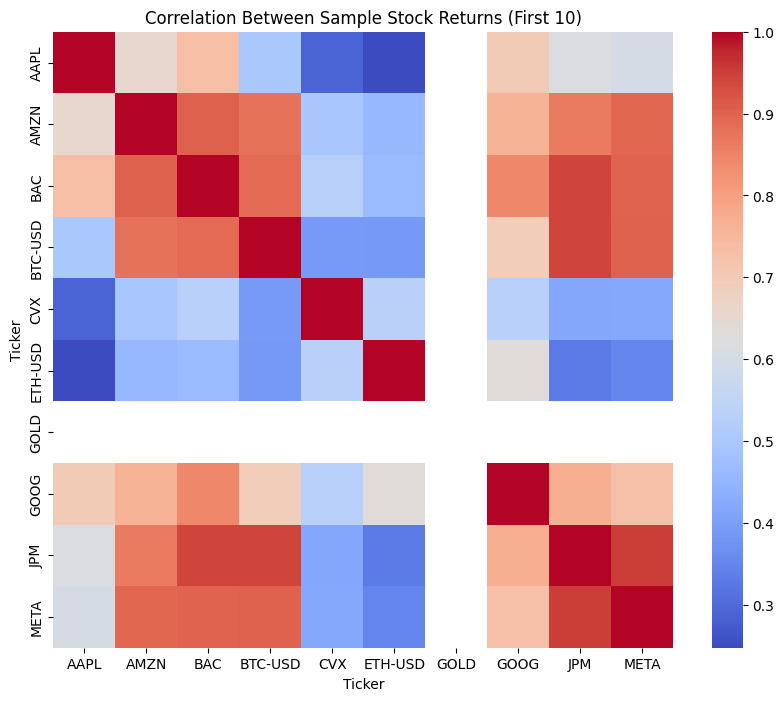


📈 Return stats (sample):


/tmp/ipython-input-2154242498.py:37: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  flat['Return'] = flat.groupby('Ticker')['Close'].pct_change()


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,658.0,0.000654,0.015140,-0.092456,-0.002742,0.000000,0.005132,0.153289
AMZN,658.0,0.000729,0.016265,-0.089791,-0.004232,0.000000,0.007182,0.119770
BAC,658.0,0.000791,0.013354,-0.110633,-0.002996,0.000000,0.005182,0.084288
BTC-USD,659.0,0.001688,0.025547,-0.086820,-0.011282,0.000732,0.013136,0.121443
CVX,658.0,0.000228,0.011645,-0.082244,-0.002333,0.000000,0.005191,0.066457


In [9]:
# ----- 2. Distribution of Volume and Prices -----
plt.figure(figsize=(8,4))
sns.histplot(flat['Close'], bins=100, kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(flat['Volume'], bins=100, kde=True, color='orange')
plt.title("Distribution of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

# ----- 3. Sample Trends -----
sample_tickers = flat['Ticker'].unique()[:5]
plt.figure(figsize=(12,6))
for t in sample_tickers:
    subset = flat[flat['Ticker']==t]
    plt.plot(subset['Date'], subset['Close'], label=t)
plt.legend()
plt.title("Price Trends for Sample Tickers")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# ----- 4. Correlation Example -----
pivot_close = flat.pivot(index='Date', columns='Ticker', values='Close')
corr_matrix = pivot_close.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix.iloc[:10,:10], cmap='coolwarm', annot=False)
plt.title("Correlation Between Sample Stock Returns (First 10)")
plt.show()

# ----- 5. Daily Returns Summary -----
flat['Return'] = flat.groupby('Ticker')['Close'].pct_change()
print("\n📈 Return stats (sample):")
display(flat.groupby('Ticker')['Return'].describe().head())

In [10]:
for col in ['Open','High','Close','Low']:
  flat[col]=np.log(flat[col])


In [11]:
from scipy.stats import zscore

In [12]:
for col in ['Open','High','Close','Low','Volume']:
  z=np.abs(zscore(flat[col],nan_policy='omit'))
  mask=(z>5)
  flat.loc[mask,col]=np.nan
flat=flat.fillna(method='ffill')



/tmp/ipython-input-2269025821.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  flat=flat.fillna(method='ffill')


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()
cols=['Open','Close','Low','High','Volume']
def scale_fn(df):
  df=df.copy()
  for c in cols:
    df[c]=scaler.fit_transform(df[[c]])
  return df


flat=flat.groupby('Ticker',group_keys=False).apply(scale_fn)

/tmp/ipython-input-3560974107.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  flat=flat.groupby('Ticker',group_keys=False).apply(scale_fn)


In [15]:
movements = flat.groupby("Ticker")["Close"].agg(["min","max"])
constant_tickers = movements[(movements["max"] - movements["min"]) < 0.01].index
flat = flat[~flat["Ticker"].isin(constant_tickers)]
print(f"Removed {len(constant_tickers)} nearly-flat tickers")

Removed 2 nearly-flat tickers


In [16]:
flat["Return"] = flat.groupby("Ticker")["Close"].pct_change()

/tmp/ipython-input-3821863685.py:1: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  flat["Return"] = flat.groupby("Ticker")["Close"].pct_change()


In [17]:
check = flat.groupby("Ticker")["Close"].agg(["min","max","mean","std"])
check["range"] = check["max"] - check["min"]
print(check.sort_values("range").head(10))

         min  max      mean       std  range
Ticker                                      
AAPL     0.0  1.0  0.543349  0.246362    1.0
AMZN     0.0  1.0  0.515073  0.193190    1.0
BAC      0.0  1.0  0.150352  0.074193    1.0
BTC-USD  0.0  1.0  0.605238  0.254325    1.0
CVX      0.0  1.0  0.018338  0.039029    1.0
ETH-USD  0.0  1.0  0.583712  0.211071    1.0
GOOG     0.0  1.0  0.084299  0.054491    1.0
META     0.0  1.0  0.666933  0.191633    1.0
QQQ      0.0  1.0  0.816291  0.091682    1.0
MSFT     0.0  1.0  0.275826  0.132516    1.0


In [18]:
flat['Date']=pd.to_datetime(flat['Date'])

cutoff=flat['Date'].max()-pd.Timedelta(days=365)
flat=flat[flat['Date']>=cutoff]

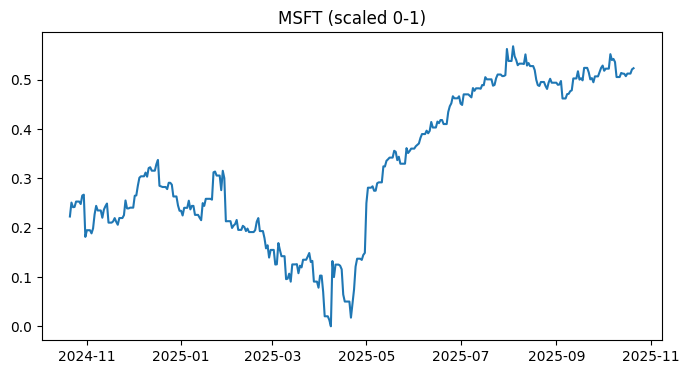

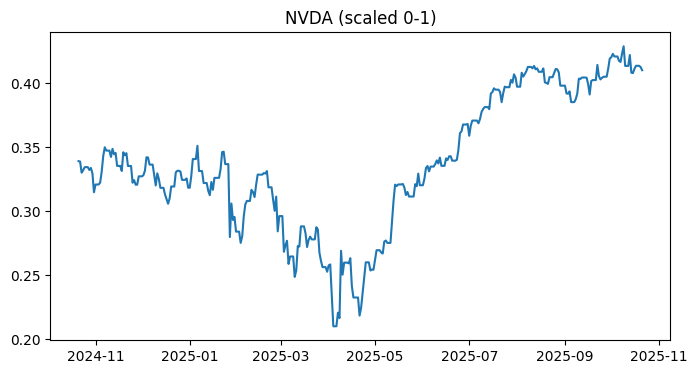

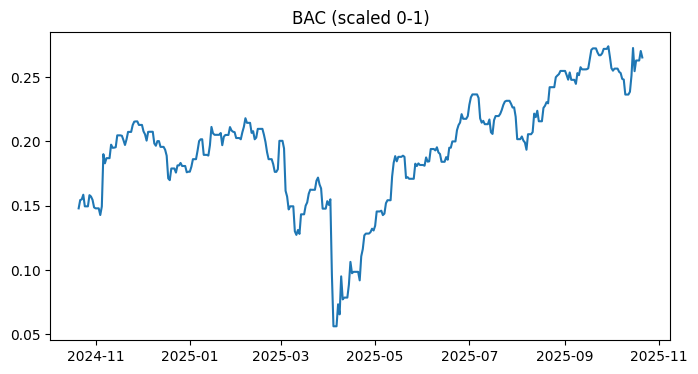

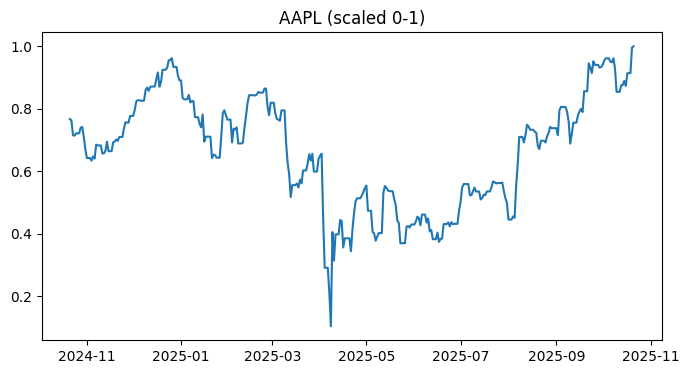

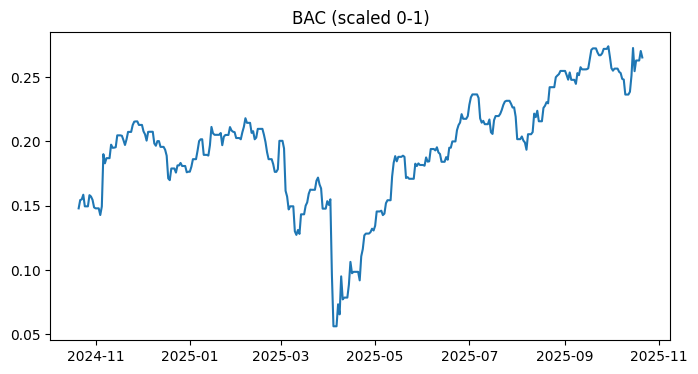

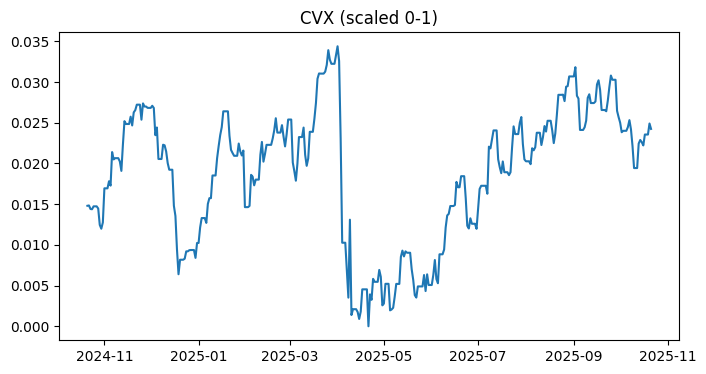

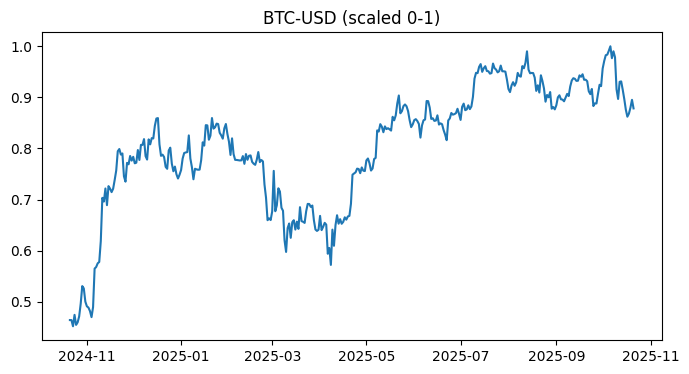

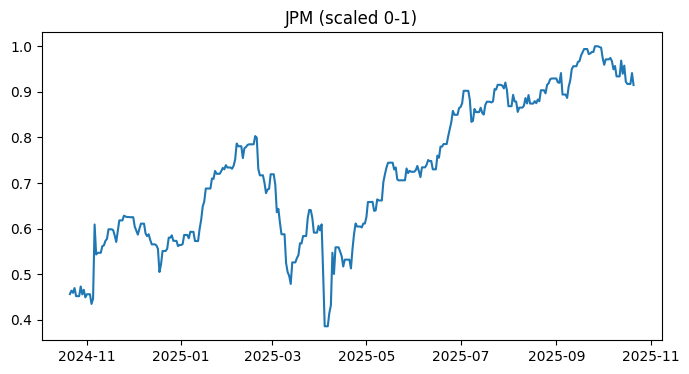

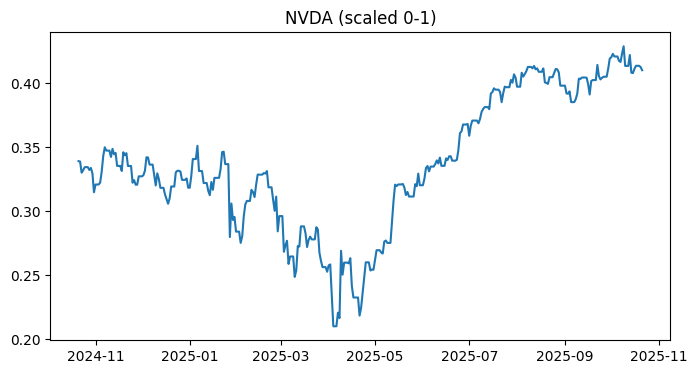

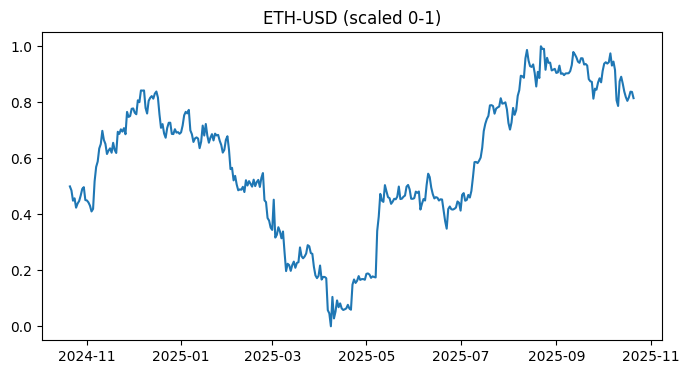

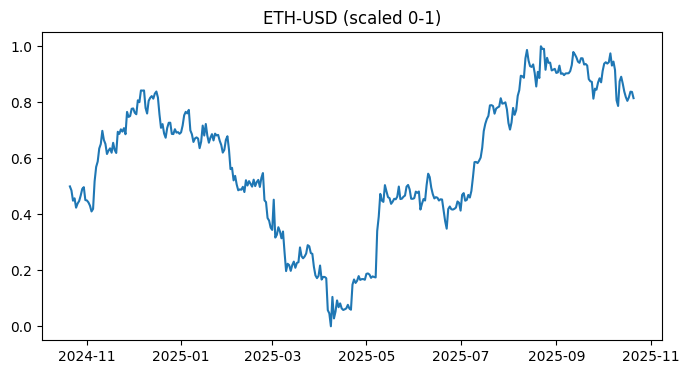

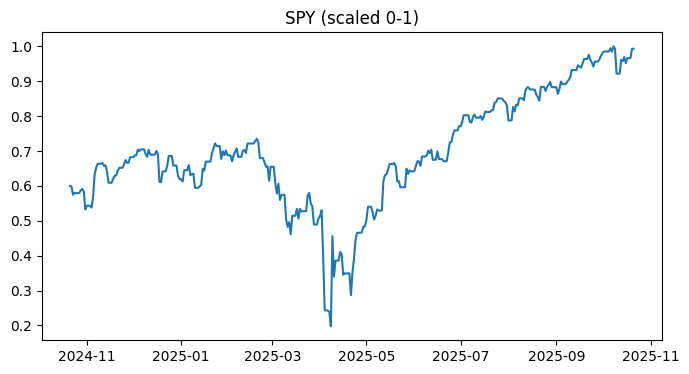

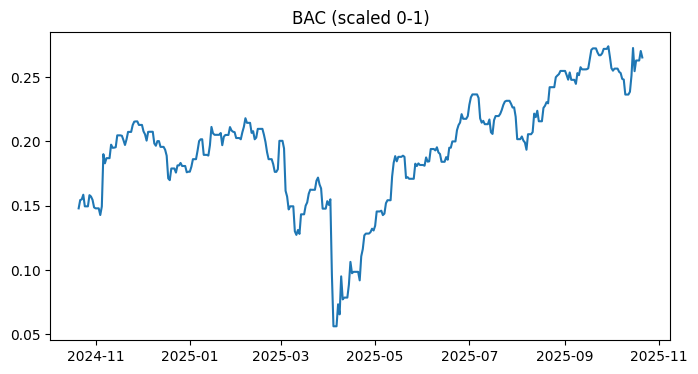

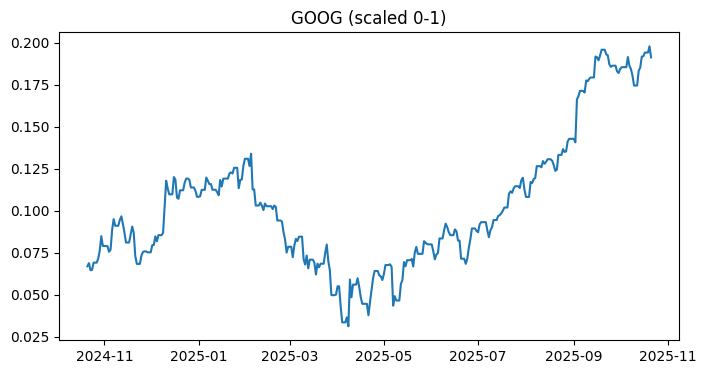

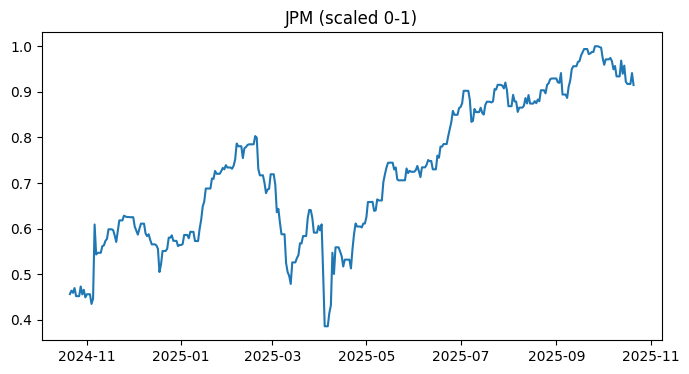

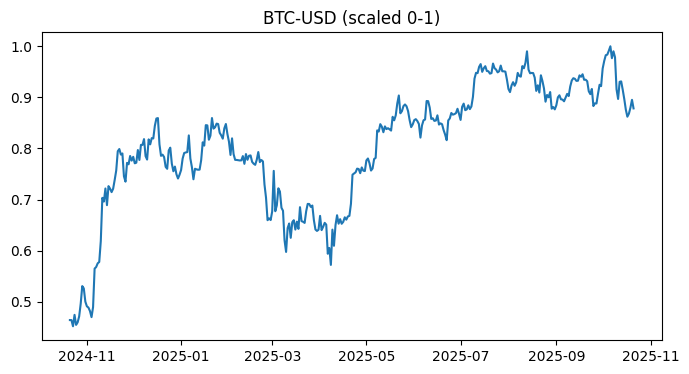

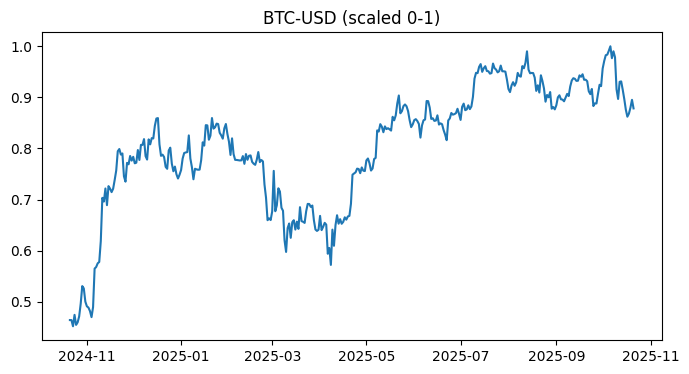

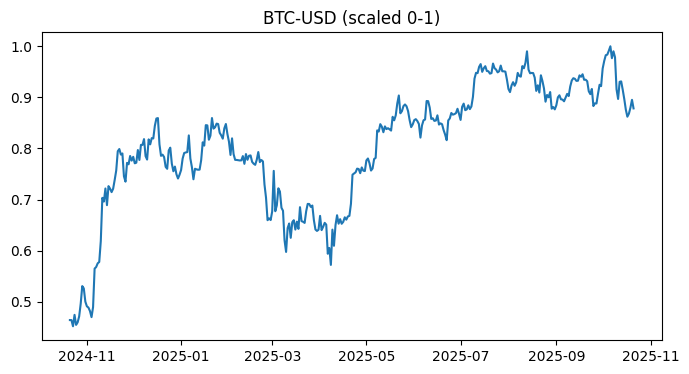

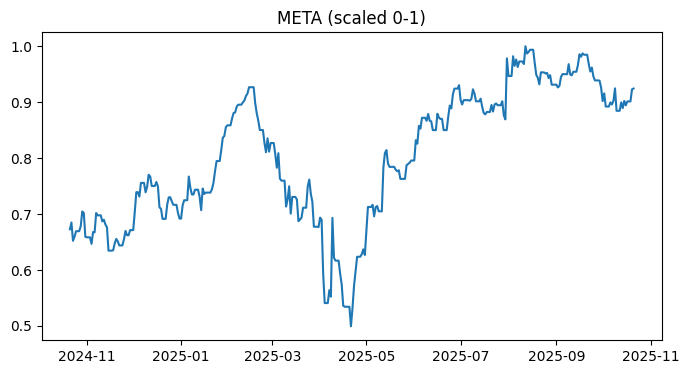

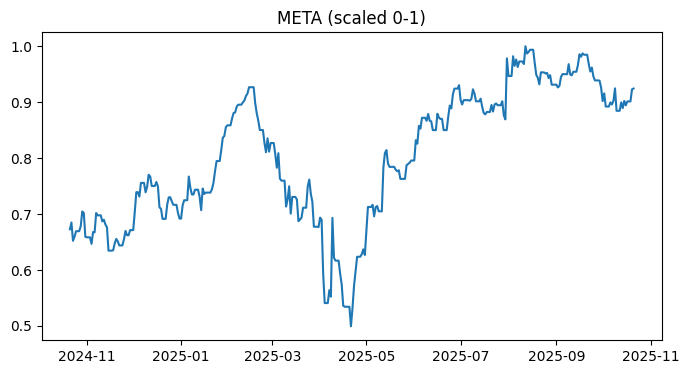

In [19]:
sample_tickers = flat["Ticker"].sample(20, random_state=42)
for t in sample_tickers:
    s = flat[flat["Ticker"] == t]
    plt.figure(figsize=(8,4))
    plt.plot(s["Date"], s["Close"])
    plt.title(f"{t} (scaled 0-1)")
    plt.show()

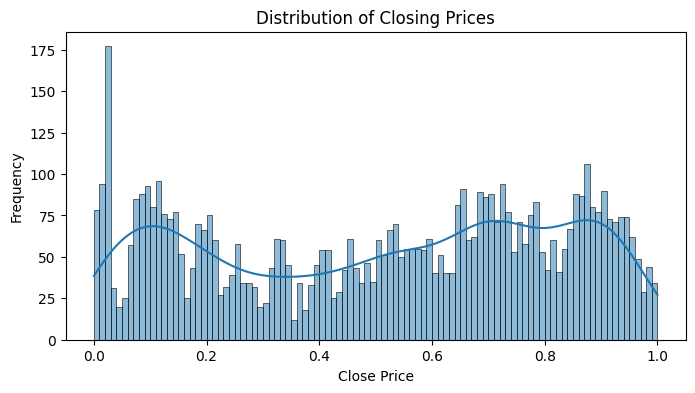

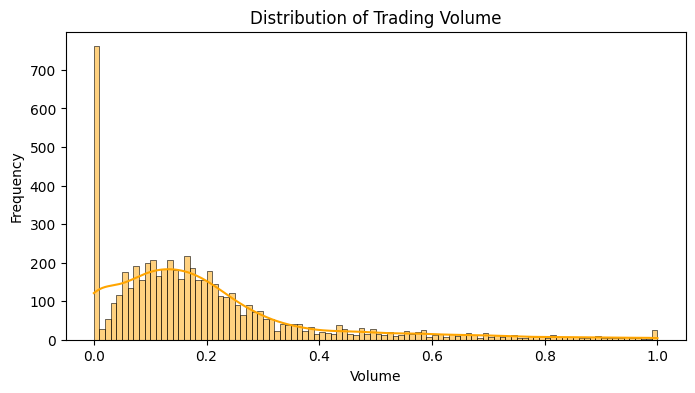

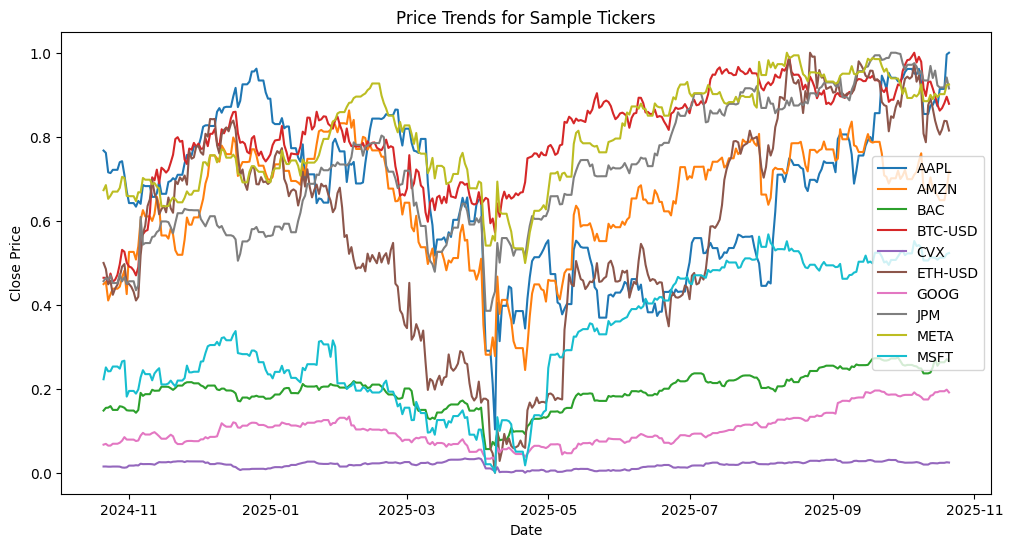

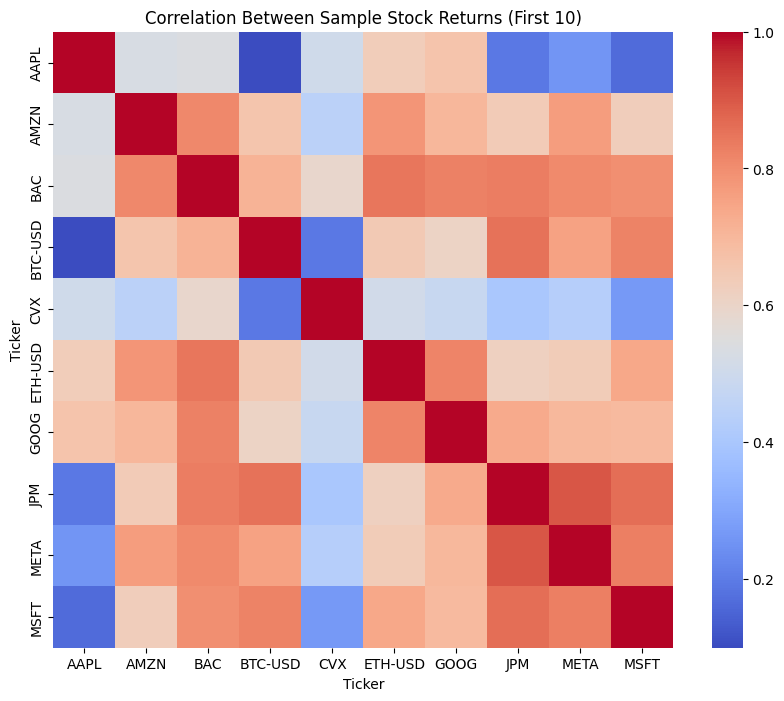


📈 Return stats (sample):


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,365.0,0.007378,0.166415,-0.512042,-0.008005,0.000000,0.016595,2.928585
AMZN,365.0,0.003144,0.063745,-0.309070,-0.013792,0.000000,0.019009,0.681839
BAC,365.0,0.003248,0.056296,-0.414027,-0.007424,0.000000,0.011657,0.450737
BTC-USD,365.0,0.002147,0.028473,-0.104460,-0.011496,0.000341,0.012487,0.153992
CVX,365.0,inf,NaN,-1.000000,-0.018887,0.000000,0.046399,inf


In [20]:
# ----- 2. Distribution of Volume and Prices -----
plt.figure(figsize=(8,4))
sns.histplot(flat['Close'], bins=100, kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(flat['Volume'], bins=100, kde=True, color='orange')
plt.title("Distribution of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

# ----- 3. Sample Trends -----
sample_tickers = flat['Ticker'].unique()[:10]
plt.figure(figsize=(12,6))
for t in sample_tickers:
    subset = flat[flat['Ticker']==t]
    plt.plot(subset['Date'], subset['Close'], label=t)
plt.legend()
plt.title("Price Trends for Sample Tickers")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# ----- 4. Correlation Example -----
pivot_close = flat.pivot(index='Date', columns='Ticker', values='Close')
corr_matrix = pivot_close.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix.iloc[:10,:10], cmap='coolwarm', annot=False)
plt.title("Correlation Between Sample Stock Returns (First 10)")
plt.show()

# ----- 5. Daily Returns Summary -----
flat['Return'] = flat.groupby('Ticker')['Close'].pct_change()
print("\n📈 Return stats (sample):")
display(flat.groupby('Ticker')['Return'].describe().head())

In [21]:
!pip install ta --quiet

import pandas as pd
import numpy as np
from ta.trend import MACD, SMAIndicator
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.volume import OnBalanceVolumeIndicator


  Preparing metadata (setup.py) ... done


In [22]:
features=flat.copy()
flatness = features.groupby("Ticker")["Close"].agg(["min","max","std"])
flatness["range"] = flatness["max"] - flatness["min"]
flatness.sort_values("range").head(10)

,min,max,std,range
Ticker,,,,
CVX,0.000000,0.034392,0.008256,0.034392
XOM,0.046980,0.167210,0.026358,0.120231
GOOG,0.031119,0.197762,0.040020,0.166643
BAC,0.056288,0.274024,0.043861,0.217736
NVDA,0.209909,0.428774,0.052698,0.218865
QQQ,0.681545,1.000000,0.066173,0.318455
META,0.499291,1.000000,0.119405,0.500709
TSLA,0.262817,0.783836,0.119208,0.521020
BTC-USD,0.451969,1.000000,0.120755,0.548031


In [23]:

features["Return"] = features.groupby("Ticker")["Close"].pct_change()
features["Return"] = features["Return"].fillna(0)

def add_indicators(df):
  df=df.copy()
  df = df.sort_values("Date").reset_index(drop=True)

  if len(df) < 30:   # skip very short tickers
        return pd.DataFrame()

# MACD (use small spans for recent data)
  df["EMA_12"] = df["Close"].ewm(span=6, adjust=False).mean()
  df["EMA_26"] = df["Close"].ewm(span=13, adjust=False).mean()
  df["MACD"] = df["EMA_12"] - df["EMA_26"]
  df["MACD_Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
  df["MACD_Diff"] = df["MACD"] - df["MACD_Signal"]

  # --- RSI (7-day) ---
  delta = df["Close"].diff()
  gain = delta.clip(lower=0)
  loss = -delta.clip(upper=0)
  avg_gain = gain.rolling(window=7, min_periods=1).mean()
  avg_loss = loss.rolling(window=7, min_periods=1).mean()
  rs = avg_gain / (avg_loss + 1e-9)
  df["RSI"] = 100 - (100 / (1 + rs))

    # Bollinger Bands (window=10)
 # --- Bollinger Bands (10-day) ---
  sma = df["Close"].rolling(window=10, min_periods=1).mean()
  std = df["Close"].rolling(window=10, min_periods=1).std(ddof=0)
  df["BB_High"] = sma + (std * 2)
  df["BB_Low"] = sma - (std * 2)
  df["BB_Pct"] = np.where(
      (df["BB_High"] - df["BB_Low"]) != 0,
      (df["Close"] - df["BB_Low"]) / (df["BB_High"] - df["BB_Low"]),
      0.5
  )
    # OBV
  df["OBV"] = (np.sign(df["Close"].diff()) * df["Volume"]).fillna(0).cumsum()

    # MAE (mean absolute error between Close and 10-day MA)
  df["MAE"] = (df["Close"] - sma).abs()

  return df.drop(columns=["EMA_12", "EMA_26"])


features=features.groupby('Ticker',group_keys=False).apply(add_indicators)

features = features.dropna(subset=['Close', 'MACD', 'RSI', 'OBV'], how='all')

# Also remove tickers with too many missing values
valid_tickers = (
    features.groupby("Ticker")["Return"]
    .apply(lambda x: x.notna().sum())
    .reset_index(name="non_na")
)
valid_tickers = valid_tickers[valid_tickers["non_na"] > 25]["Ticker"]  # at least ~1 month of data

features = features[features['Ticker'] != 'AACB'].reset_index(drop=True)
features=features.drop(columns='Adj Close')

print("✅ Cleaned dataset — ready for modeling")
print("Remaining tickers:", features["Ticker"].nunique())
print("Shape:", features.shape)
features.head(50)

✅ Cleaned dataset — ready for modeling
Remaining tickers: 16
Shape: (5856, 17)


/tmp/ipython-input-2188711669.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features=features.groupby('Ticker',group_keys=False).apply(add_indicators)


Price,Date,Ticker,Open,High,Low,Close,Volume,Return,MACD,MACD_Signal,MACD_Diff,RSI,BB_High,BB_Low,BB_Pct,OBV,MAE
0,2024-10-21,AAPL,0.753120,0.750752,0.757435,0.767066,0.044068,0.000000,0.000000,0.000000,0.000000,NaN,0.767066,0.767066,0.500000,0.000000,0.000000
1,2024-10-22,AAPL,0.747999,0.745128,0.740739,0.761510,0.052842,-0.007243,-0.000794,-0.000159,-0.000635,0.000000,0.769844,0.758732,0.250000,-0.052842,0.002778
2,2024-10-23,AAPL,0.749738,0.735452,0.696423,0.715244,0.098334,-0.060756,-0.007857,-0.001698,-0.006158,0.000000,0.794401,0.701479,0.148136,-0.151176,0.032696
3,2024-10-24,AAPL,0.711897,0.696298,0.702429,0.713500,0.026654,-0.002438,-0.012109,-0.003781,-0.008329,0.000000,0.789415,0.689245,0.242144,-0.177830,0.025830
4,2024-10-25,AAPL,0.709662,0.718140,0.713105,0.721197,0.052692,0.010787,-0.013119,-0.005648,-0.007471,12.563625,0.782791,0.688616,0.345966,-0.125138,0.014506
5,2024-10-26,AAPL,0.709662,0.718140,0.713105,0.721197,0.052692,0.000000,-0.013202,-0.007159,-0.006043,12.563625,0.777610,0.688962,0.363634,-0.125138,0.012089
6,2024-10-27,AAPL,0.709662,0.718140,0.713105,0.721197,0.052692,0.000000,-0.012714,-0.008270,-0.004444,12.563624,0.773458,0.689660,0.376351,-0.125138,0.010362
7,2024-10-28,AAPL,0.742774,0.731767,0.740286,0.739320,0.043502,0.025128,-0.009307,-0.008477,-0.000830,32.524005,0.772057,0.693001,0.585896,-0.081636,0.006791
8,2024-10-29,AAPL,0.740754,0.728166,0.738201,0.741767,0.041234,0.003310,-0.006492,-0.008080,0.001588,37.057824,0.771272,0.695839,0.608853,-0.040402,0.008211
9,2024-10-30,AAPL,0.736248,0.720402,0.712922,0.709182,0.080679,-0.043928,-0.009158,-0.008296,-0.000862,45.157749,0.769772,0.692464,0.216255,-0.121081,0.021936


In [24]:
#Feature engineering Volatility , Momentum , etc...

features['Log_Return']=np.log(features['Close']/features['Close'].shift(1))

features['Momentum']=features['Close']/features['Close'].shift(7)-1

features['Volatility']=features['Return'].rolling(7).std()

features['Volume_Change']=features['Volume'].pct_change()

features['OBV_MA']=features['OBV'].rolling(10).mean()

features['MA_fast']=features['Close'].rolling(20).mean()

features['MA_slow']=features['Close'].rolling(50).mean()

features['Convergence']=(np.where(features['MA_slow']>features['MA_fast'],1,0))

features['Price_VS_bb']=(features['Close']-features['BB_Low'])/(features['BB_High']-features['BB_Low'])

features['Skew']=features['Return'].rolling(7).skew()

features['Kurt']=features['Return'].rolling(7).kurt()

features.dropna().reset_index(drop=True)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Price,Date,Ticker,Open,High,Low,Close,Volume,Return,MACD,MACD_Signal,...,Momentum,Volatility,Volume_Change,OBV_MA,MA_fast,MA_slow,Convergence,Price_VS_bb,Skew,Kurt
0,2024-12-09,AAPL,0.821843,0.843729,0.824372,0.859368,0.072482,0.040949,0.025846,0.024763,...,0.078191,0.018220,0.570450,0.053885,0.773661,0.721716,0,0.942083,1.247519,-0.527622
1,2024-12-10,AAPL,0.866188,0.851997,0.855438,0.868099,0.046303,0.010160,0.027542,0.025319,...,0.053639,0.015253,-0.361176,0.087711,0.781998,0.723737,0,0.928585,2.295972,5.437802
2,2024-12-11,AAPL,0.875449,0.873916,0.863326,0.857137,0.074366,-0.012628,0.025890,0.025433,...,0.036387,0.017087,0.606063,0.114100,0.790008,0.725650,0,0.789353,1.830589,4.089400
3,2024-12-12,AAPL,0.866188,0.856501,0.858357,0.869721,0.032300,0.014682,0.025619,0.025470,...,0.051271,0.017258,-0.565666,0.135290,0.798025,0.728739,0,0.882253,1.317924,2.264097
4,2024-12-13,AAPL,0.874240,0.861164,0.863155,0.871172,0.033578,0.001668,0.024615,0.025299,...,0.055247,0.016972,0.039590,0.154549,0.806113,0.731893,0,0.821070,1.283353,2.412551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,2025-10-17,XOM,0.129232,0.133374,0.132096,0.132121,0.122692,0.073814,-0.002216,-0.002504,...,0.069344,0.045056,0.414368,-1.249613,0.134604,0.135695,1,0.600142,0.615238,-1.016226
5756,2025-10-18,XOM,0.129232,0.133374,0.132096,0.132121,0.122692,0.000000,-0.001491,-0.002302,...,0.069344,0.045056,0.000000,-1.262673,0.133231,0.135466,1,0.686238,0.615238,-1.016226
5757,2025-10-19,XOM,0.129232,0.133374,0.132096,0.132121,0.122692,0.000000,-0.000986,-0.002038,...,0.069344,0.045056,0.000000,-1.268784,0.132678,0.135237,1,0.730410,0.615238,-1.016226
5758,2025-10-20,XOM,0.131313,0.134706,0.136604,0.134708,0.038362,0.019581,-0.000268,-0.001684,...,0.019581,0.037514,-0.687334,-1.258038,0.132664,0.135060,1,0.814228,0.974567,1.763379


In [25]:
def add_target(df):
  df=df.sort_values('Date').reset_index(drop=True)
  df['Target']=(df['Close'].shift(-1)<df['Close']).astype(int)
  return df

features=features.groupby('Ticker',group_keys=False).apply(add_target)
features=features.dropna(subset=['Target']).reset_index(drop=True)

print("✅ Target column added successfully!")
print("Unique values:", features["Target"].unique())
print(features[["Date","Ticker","Close","Target"]].tail(10))

/tmp/ipython-input-157011320.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features=features.groupby('Ticker',group_keys=False).apply(add_target)


✅ Target column added successfully!
Unique values: [1 0]
Price       Date Ticker     Close  Target
5846  2025-10-12    XOM  0.123554       0
5847  2025-10-13    XOM  0.132121       0
5848  2025-10-14    XOM  0.132403       1
5849  2025-10-15    XOM  0.128561       1
5850  2025-10-16    XOM  0.123039       0
5851  2025-10-17    XOM  0.132121       0
5852  2025-10-18    XOM  0.132121       0
5853  2025-10-19    XOM  0.132121       0
5854  2025-10-20    XOM  0.134708       0
5855  2025-10-21    XOM  0.134765       0


In [26]:
features['Target'].value_counts(normalize=True)

,proportion
Target,
0,0.665301
1,0.334699


In [27]:
features.groupby('Ticker')['Target'].mean().sort_values()

,Target
Ticker,
QQQ,0.292350
SPY,0.295082
JPM,0.297814
MSFT,0.303279
NFLX,0.306011
BAC,0.306011
CVX,0.311475
AAPL,0.314208
GOOG,0.314208


In [28]:
#TRAIN TEST SPLITTING FOR TRAINING

train_list,test_list=[],[]

split_ratio=0.8
for ticker, df_t in features.groupby('Ticker'):
  df_t=df_t.sort_values('Date').reset_index(drop=True)
  split_index=int(len(df_t)*split_ratio)

  train_list.append(df_t.iloc[:split_index])
  test_list.append(df_t.iloc[split_index:])

train_df=pd.concat(train_list).reset_index(drop=True)
test_df=pd.concat(test_list).reset_index(drop=True)

# sanity check
print("✅ Time-based split completed!\n")
print(f"Training samples: {len(train_df)}")
print(f"Testing samples : {len(test_df)}")
print(f"Tickers in train: {train_df['Ticker'].nunique()} | in test: {test_df['Ticker'].nunique()}")
print(f"Train date range: {train_df['Date'].min()} → {train_df['Date'].max()}")
print(f"Test  date range: {test_df['Date'].min()} → {test_df['Date'].max()}")




✅ Time-based split completed!

Training samples: 4672
Testing samples : 1184
Tickers in train: 16 | in test: 16
Train date range: 2024-10-21 00:00:00 → 2025-08-08 00:00:00
Test  date range: 2025-08-09 00:00:00 → 2025-10-21 00:00:00


In [29]:
x_train = train_df.drop(columns=['Date', 'Ticker', 'Target'])
x_test  = test_df.drop(columns=['Date', 'Ticker', 'Target'])

x_train = x_train.select_dtypes(include=['float64', 'int64'])
x_test  = x_test.select_dtypes(include=['float64', 'int64'])


y_train = train_df['Target']

y_test  = test_df['Target']


In [30]:
x_train = x_train.replace([np.inf, -np.inf], np.nan).fillna(0)
x_test  = x_test.replace([np.inf, -np.inf], np.nan).fillna(0)

In [31]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [32]:
from imblearn.over_sampling import SMOTE
import numpy as np

sm = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=3)
X_res, y_res = sm.fit_resample(x_train, y_train)

print("Before:", np.bincount(y_train))
print("After :", np.bincount(y_res))

Before: [3109 1563]
After : [3109 3109]


In [33]:
#pos = y_train.sum()
#neg = len(y_train) - pos
#scale = neg / pos

def tune_xg(x_train,y_train):
  model=XGBClassifier(
      objective='binary:logistic',
      eval_metric='logloss',
      use_label_encoder=False,
      #scale_pos_weight=scale,
      random_state=42,
      n_jobs=-1
  )

  param_grid={
      'n_estimators':[100,200,300],
      'max_depth':[3,5,7],
      'learning_rate':[0.01,0.1,1],
      'subsample':[0.8,0.9,1.0],
      'colsample_bytree': [0.8, 1.0]
  }

  grid=GridSearchCV(model,
                    param_grid,
                    scoring='f1',
                    n_jobs=-1,
                    cv=2,
                    verbose=1
                    )

  grid.fit(x_train,y_train)
  print(f'best parameters{grid.best_params_}')
  return grid.best_estimator_

XGB_model=tune_xg(x_train,y_train)
XGB_model.fit(x_train,y_train)

y_pred = XGB_model.predict(x_test)
y_proba = XGB_model.predict_proba(x_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Fitting 2 folds for each of 162 candidates, totalling 324 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:42:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


best parameters{'colsample_bytree': 0.8, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:42:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.58      0.63       787
           1       0.35      0.45      0.40       397

    accuracy                           0.54      1184
   macro avg       0.52      0.52      0.51      1184
weighted avg       0.57      0.54      0.55      1184

ROC-AUC: 0.5252225234365748


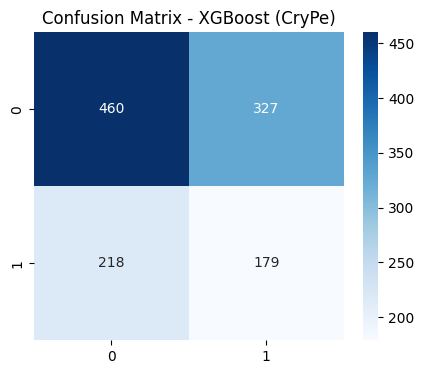

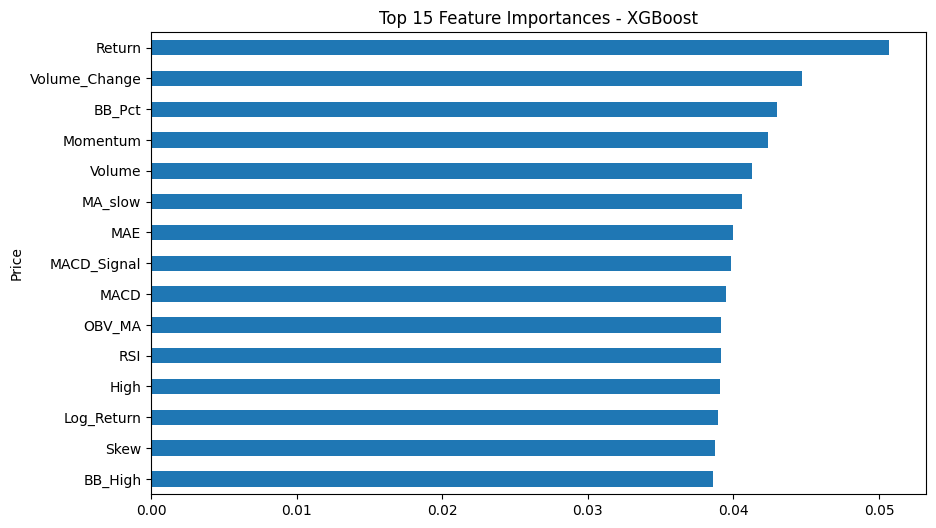

In [34]:


# --- 5️⃣ Confusion Matrix ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (CryPe)')
plt.show()

# --- 6️⃣ Feature Importance ---
plt.figure(figsize=(10,6))
pd.Series(XGB_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)[:15].plot(kind='barh')
plt.title("Top 15 Feature Importances - XGBoost")
plt.gca().invert_yaxis()
plt.show()


In [35]:
#REMOVING NULL VALUES FOR TRAINING ON NON NULL VALUES ONLY
features = features.replace([np.inf, -np.inf], np.nan)
features = features.fillna(method='ffill').fillna(method='bfill')

/tmp/ipython-input-2288185722.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features = features.fillna(method='ffill').fillna(method='bfill')


In [36]:
from sklearn.preprocessing import StandardScaler

def scale_per_ticker(df):
    df = df.copy()
    non_numeric = ['Date', 'Ticker']  # columns to exclude
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [c for c in numeric_cols if c not in non_numeric]

    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

# Apply scaling
features_scaled = features.groupby("Ticker", group_keys=False).apply(scale_per_ticker).reset_index(drop=True)


/tmp/ipython-input-3540193861.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features_scaled = features.groupby("Ticker", group_keys=False).apply(scale_per_ticker).reset_index(drop=True)


In [37]:
features['Target'] = (features.groupby('Ticker')['Close'].shift(-1) >
                      features['Close']).astype(int)

In [38]:
split_date = features['Date'].quantile(0.8)  # 80% train, 20% test by time
train_features = features[features['Date'] <= split_date].reset_index(drop=True)
test_features  = features[features['Date'] > split_date].reset_index(drop=True)

print("✅ Time-based split completed!")
print(f"Train date range: {train_features['Date'].min()} → {train_features['Date'].max()}")
print(f"Test  date range: {test_features['Date'].min()} → {test_features['Date'].max()}")
print(f"Tickers in train: {train_features['Ticker'].nunique()} | in test: {test_features['Ticker'].nunique()}")

✅ Time-based split completed!
Train date range: 2024-10-21 00:00:00 → 2025-08-09 00:00:00
Test  date range: 2025-08-10 00:00:00 → 2025-10-21 00:00:00
Tickers in train: 16 | in test: 16


In [39]:
#CREATING LSTM MODEL
def create_sequence(data,window=30):
  x,y=[],[]
  for i in range(len(data)-window):
    x.append(data.iloc[i:i+window].drop(columns=['Target']).values)
    y.append(data.iloc[i+window]['Target'])
  return np.array(x) , np.array(y)

def balanced_seq(features,window=30):
  X_pos, y_pos, X_neg, y_neg = [], [], [], []
  for t in features['Ticker'].unique():
    df=features[features['Ticker']==t].drop(columns=["Date",'Ticker'])
    x,y=create_sequence(df)
    X_pos.append(x[y==1]); y_pos.append(y[y==1])
    X_neg.append(x[y==0]); y_neg.append(y[y==0])
  X_pos = np.concatenate(X_pos) if X_pos else np.empty((0,window,df.shape[1]-1))
  y_pos = np.concatenate(y_pos) if y_pos else np.empty((0,))
  X_neg = np.concatenate(X_neg); y_neg = np.concatenate(y_neg)

    # upsample positives to match negatives (or to desired ratio)
  if len(X_pos) > 0:
      rng = np.random.default_rng(42)
      idx = rng.choice(len(X_pos), size=min(len(X_neg), len(X_pos)*2), replace=True)  # 2x positives
      X_bal = np.concatenate([X_neg, X_pos[idx]])
      y_bal = np.concatenate([y_neg, y_pos[idx]])
  else:
      X_bal, y_bal = X_neg, y_neg

  p = np.random.permutation(len(X_bal))
  return X_bal[p], y_bal[p]




In [40]:
X_train_bal, y_train_bal = balanced_seq(train_features, window=30)
X_test_seq,  y_test_seq  = balanced_seq(test_features,  window=30)

print(X_train_bal.shape, y_train_bal.shape)
print(X_test_seq.shape, y_test_seq.shape)

(5210, 30, 26) (5210,)
(836, 30, 26) (836,)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [44]:
#OVERSAMPLING MINORITY CLASS(Y_TRAIN)
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train_bal)
weights = compute_class_weight('balanced', classes=classes, y=y_train_bal)
class_weights = dict(zip(classes, weights))
print(class_weights)

{np.float64(0.0): np.float64(1.0), np.float64(1.0): np.float64(1.0)}


In [45]:
lstm_model=Sequential([
    LSTM(128,return_sequences=True,input_shape=(X_train_bal.shape[1],X_train_bal.shape[2])),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

lstm_model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='mse',
    metrics=['accuracy']
)

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_history=lstm_model.fit(
    X_train_bal,y_train_bal,
    validation_split=0.2,
    epochs=50,
    #class_weight=class_weights,
    callbacks=[es],
    batch_size=64,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.4803 - loss: 0.2549 - val_accuracy: 0.4894 - val_loss: 0.2504
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5066 - loss: 0.2501 - val_accuracy: 0.4894 - val_loss: 0.2501
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4948 - loss: 0.2503 - val_accuracy: 0.5067 - val_loss: 0.2500
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4909 - loss: 0.2505 - val_accuracy: 0.5010 - val_loss: 0.2500
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5159 - loss: 0.2498 - val_accuracy: 0.4894 - val_loss: 0.2524
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4939 - loss: 0.2516 - val_accuracy: 0.4894 - val_loss: 0.2513
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5102 - loss: 0.2498 - val_accuracy: 0.5077 - val_loss: 0.2502
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5095 - loss: 0.2496 - val_accuracy: 0.4818 - 

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


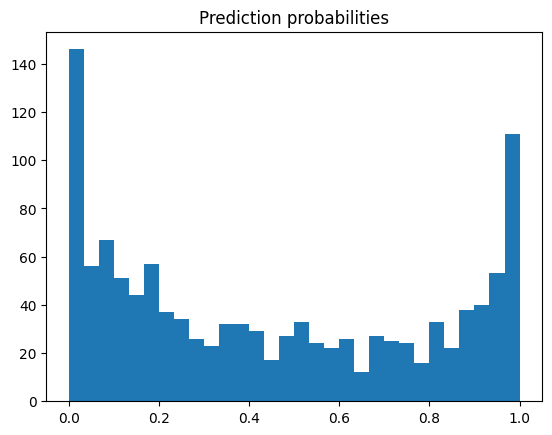

In [46]:
y_proba_lstm = lstm_model.predict(X_test_seq).ravel()
plt.hist(y_proba, bins=30)
plt.title("Prediction probabilities")
plt.show()

In [48]:
for th in [0.5, 0.45, 0.4, 0.35,0.2]:
    y_pred = (y_proba_lstm > th).astype(int)
    print(f"\nThreshold {th}")
    print(classification_report(y_test_seq, y_pred))

from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_test_seq, y_pred))


Threshold 0.5
              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52       418
         1.0       0.51      0.49      0.50       418

    accuracy                           0.51       836
   macro avg       0.51      0.51      0.51       836
weighted avg       0.51      0.51      0.51       836


Threshold 0.45
              precision    recall  f1-score   support

         0.0       0.51      0.46      0.48       418
         1.0       0.50      0.55      0.53       418

    accuracy                           0.50       836
   macro avg       0.50      0.50      0.50       836
weighted avg       0.50      0.50      0.50       836


Threshold 0.4
              precision    recall  f1-score   support

         0.0       0.50      0.37      0.42       418
         1.0       0.50      0.64      0.56       418

    accuracy                           0.50       836
   macro avg       0.50      0.50      0.49       836
weighted avg       0.50     

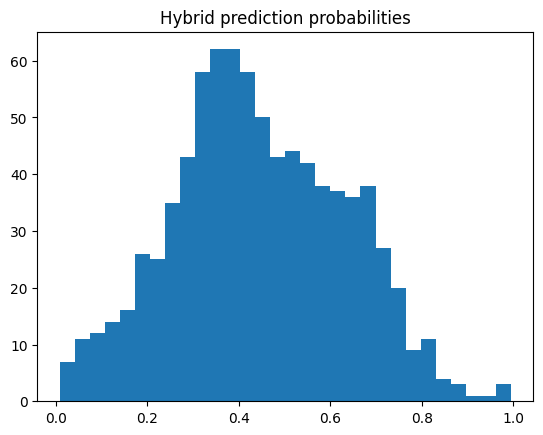

In [58]:
min_len = min(len(y_proba_lstm), len(y_proba))
y_proba_hybrid = 0.6*y_proba_lstm[:min_len] + 0.4*y_proba[:min_len]
y_pred_hybrid  = (y_proba_hybrid > 0.35).astype(int)
plt.hist(y_proba_hybrid, bins=30)
plt.title("Hybrid prediction probabilities")
plt.show()

In [63]:
y_true_aligned = y_test[:min_len]
print(classification_report(y_true_aligned, y_pred_hybrid))
print("ROC-AUC:", roc_auc_score(y_true_aligned, y_proba_hybrid))

              precision    recall  f1-score   support

           0       0.65      0.33      0.43       541
           1       0.36      0.68      0.47       295

    accuracy                           0.45       836
   macro avg       0.51      0.51      0.45       836
weighted avg       0.55      0.45      0.45       836

ROC-AUC: 0.5194335662144804


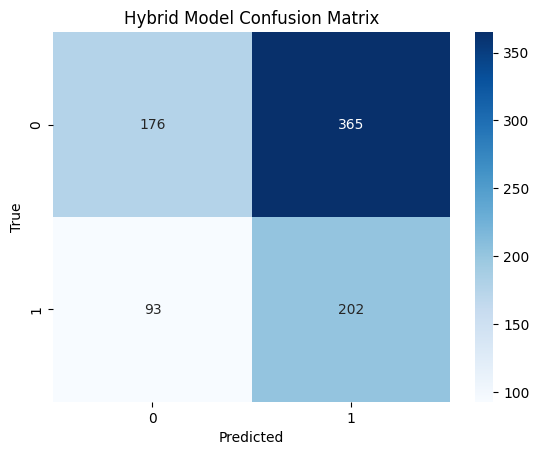

In [64]:
import seaborn as sns
cm = confusion_matrix(y_true_aligned, y_pred_hybrid)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Hybrid Model Confusion Matrix")
plt.show()

In [68]:
!pip install darts
from darts.models import TFTModel  # from the 'darts' library
from darts import TimeSeries

# Example


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 56.6 MB/s eta 0:00:00


ERROR:darts.utils.ts_utils:ValueError: input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`.
ERROR:darts.utils.ts_utils:ValueError: input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`. Raised: `ValueError('input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`.')`


ValueError: input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`. Raised: `ValueError('input series must be of type `TimeSeries`, `Sequence[TimeSeries]`, or `Sequence[Sequence[TimeSeries]]`.')`

In [75]:
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

# Example for one ticker
df_aapl = features[features["Ticker"] == "AAPL"][["Date", "Close"]].copy()
df_aapl["Date"] = pd.to_datetime(df_aapl["Date"])
df_aapl = df_aapl.dropna()

series_aapl = TimeSeries.from_dataframe(df_aapl, time_col="Date", value_cols="Close")

train, val = series_aapl[:-40], series_aapl[-40:]

# Scale it (important for neural models)
scaler = Scaler()
series_aapl = scaler.fit_transform(series_aapl)

In [79]:
from darts.metrics import mape
model = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=5,
    n_epochs=50,
    random_state=42,
    batch_size=32,
)

model.fit(train, val_series=val, verbose=True)
pred = model.predict(n=5)
print("MAPE:", mape(val, pred))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.5 K     Non-trainable params
6.2 M     Total params
24.971    Total estimated m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE: 4.704207306354927


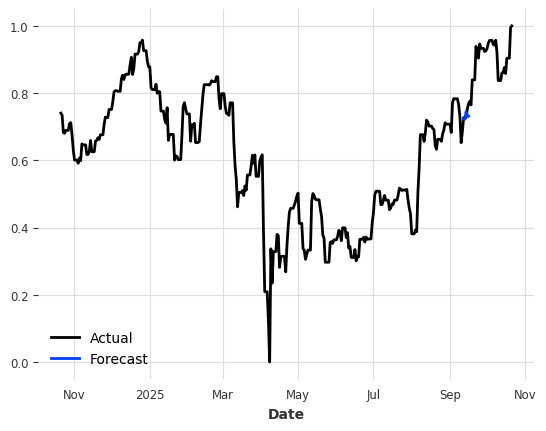

In [81]:
series_aapl.plot(label="Actual")
pred.plot(label="Forecast")
plt.legend()
plt.show()

In [82]:
pred_30 = model.predict(n=30)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]